![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# CIFAR 10 (DATOS CATEGÓRICOS)

## -Cargando el conjunto de datos

In [2]:
#Importando el set de datos CIFAR10
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer


((trainX, trainY), (testX, testY)) = cifar10.load_data()
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]


print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
print(trainX[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [4]:
print(trainY[0])

[6]


## -Inspeccionando el conjunto de datos

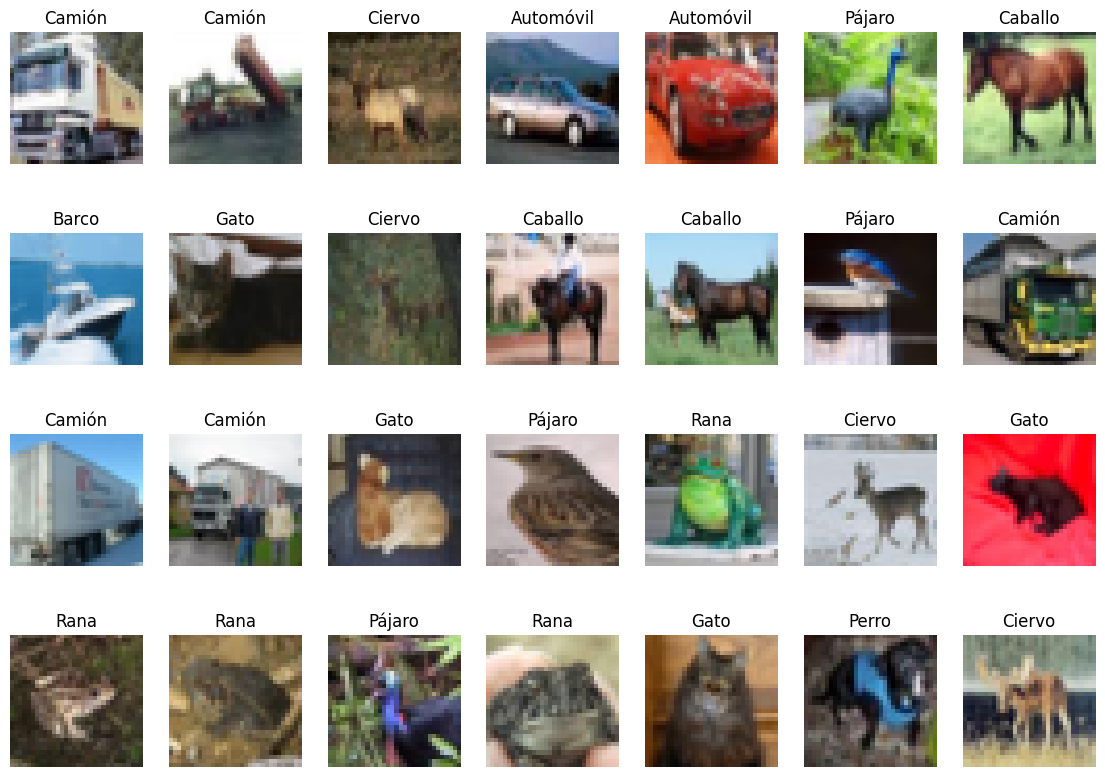

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure (figsize=(14,10))
for n in range(1,29):
    fig.add_subplot(4, 7, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

## -Acondicionando el conjunto de datos

In [6]:
#PREPROCESAMIENTO DE LOS DATOS
trainX = trainX / 255.0
testX = testX / 255.0

## -Creando la topología de red neuronal y entrenándola: MLP (Multilayer preceptor)
### El Porfe dice que esta forma de hacerlo es muy mala, es mejor la CNN

In [9]:
#Imports necesarios
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

#Arquitectura de red
#Definimos el modo API Sequential
model = Sequential()


model.add(Flatten())
model.add(Dense(2048, input_shape=(3072,), activation="relu")) # input_shape = 32 x 32 x 3
#model.add(Dropout(0.5))
model.add(Dense(1024, activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compilamos el modelo y entrenamos
print("[INFO]: Entrenando red neuronal...")
# Compilamos el modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas en decimal
# model.compile(loss="categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas en one hot encoding

# Entrenamos el perceptrón multicapa
H = model.fit(trainX, trainY, validation_split=0.2, epochs=50, batch_size=32)

# Evaluamos con las muestras de test
print("[INFO]: Evaluando modelo...")

[INFO]: Entrenando red neuronal...
Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.2712 - loss: 1.9993 - val_accuracy: 0.3762 - val_loss: 1.7428
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3948 - loss: 1.6970 - val_accuracy: 0.4120 - val_loss: 1.6411
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4287 - loss: 1.5936 - val_accuracy: 0.4232 - val_loss: 1.6195
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.4503 - loss: 1.5321 - val_accuracy: 0.4561 - val_loss: 1.5186
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4753 - loss: 1.4661 - val_accuracy: 0.4667 - val_loss: 1.5043
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4914 - loss: 1.4251 - val_accuracy: 0.4812 - val_loss: 1.4613
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.5058 - loss: 1.3816 - val_accuracy: 0.4805 - val_loss: 1.4600
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Efectuamos predicciones
predictions = model.predict(testX, batch_size=32)

# Obtenemos el report
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas en decimal
# print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas One-Hot-Encoding

# Mostramos gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## -Creando la topología de red neuronal y entrenándola: CNN (red neuronal convolucional)

In [9]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3])) # shape=(32,32,3) ####Esto se adapta perfectamente a la dimensionalidad.

#######Estamos usando la API funcional, no es la API Secuencial de antes.

# BASE MODEL

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)
x3 = Dropout(0.25)(x3)


#TOP MODEL

#Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)


#Clasificador softmax ##Esta es la capa de salida
predictions = Dense(10, activation="softmax")(xfc)

# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs
model_cnn = Model(inputs=inputs, outputs=predictions)

In [12]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_cnn.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model_cnn.fit(trainX, trainY, validation_split=0.2, batch_size=128, epochs=50, verbose=1)

# Almaceno el modelo en Drive
# Montamos la unidad de Drive
#drive.mount('/content/drive')

# Almacenamos el modelo empleando la función mdoel.save de Keras
#model_cnn.save(BASE_FOLDER+"deepCNN_CIFAR10.h5")

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_cnn.predict(testX, batch_size=128)


[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 182ms/step - accuracy: 0.9841 - loss: 0.0446 - val_accuracy: 0.8313 - val_loss: 0.8694
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 177ms/step - accuracy: 0.9847 - loss: 0.0446 - val_accuracy: 0.8461 - val_loss: 0.7714
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 178ms/step - accuracy: 0.9826 - loss: 0.0504 - val_accuracy: 0.8451 - val_loss: 0.7667
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 178ms/step - accuracy: 0.9825 - loss: 0.0493 - val_accuracy: 0.8566 - val_loss: 0.7464
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 177ms/step - accuracy: 0.9842 - loss: 0.0453 - val_accuracy: 0.8480 - val_loss: 0.7604
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 178ms/step - accuracy: 0.9850 - loss: 0.0440 - val_accuracy: 0.8467 - val_loss: 0.7416
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 178ms/step - accuracy: 0.9863 - loss: 0.0422 - val_accuracy: 0.8551 - val_loss: 0.7281
Epoch 8/50
313/313 ━━━

              precision    recall  f1-score   support

       Avión       0.88      0.82      0.85      1000
   Automóvil       0.93      0.92      0.93      1000
      Pájaro       0.76      0.81      0.78      1000
        Gato       0.67      0.76      0.71      1000
      Ciervo       0.82      0.84      0.83      1000
       Perro       0.83      0.73      0.77      1000
        Rana       0.82      0.92      0.87      1000
     Caballo       0.92      0.85      0.89      1000
       Barco       0.91      0.91      0.91      1000
      Camión       0.92      0.89      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



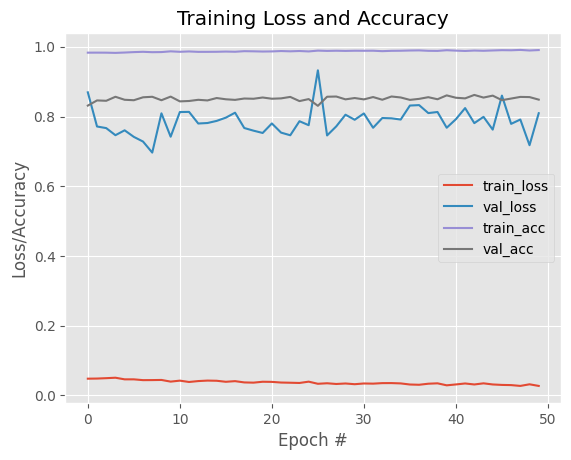

In [13]:
# Obtenemos el report
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas en decimal
# print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas One-Hot-Encoding

# Mostramos gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()